# 傅里叶变换
### 我们生活在时间的世界中，早上7：00吃早饭，8：00去上课。。。。。。 这些都是以时间为参照的，即时域分析
### 但是在频域中一切都是静止的  我们每一天都做这些东西  每天都吃早饭，每天都上课，所以在频域看这些都是静止的
## 因此我们引入频域的概念
详细傅里叶解释： https://zhuanlan.zhihu.com/p/19763358

## 傅里叶变换的作用
### 高频： 变化剧烈的灰度分量，例如边界
### 低频： 变化缓慢的灰度分量，例如一篇海

## 滤波
### 低通滤波器： 只保留低频，会使图像模糊
### 高通滤波器： 只保留高频，会使图像细节增强

### opencv中主要用的是 cv2.dft() cv2.idft(),输入图像需要先转换成np.float32格式
### 得到的结果中频率为0的部分会在左上角，通常要转换到中心位置，可以通过shift变换来实现
### cv2.dft()返回的结果是双通道的（实部，虚部），通常还需要转换成图像格式才能展示（0，255）。

In [5]:
import numpy as np
import cv2
import matplotlib.pylab as plt
%matplotlib inline

img = cv2.imread("./pic/lena.png",0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft) #将频率为0的点转换到中间

# trans = cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])#转换完之后的数值非常小，因此需要把他放大

In [6]:
dft_shift

array([[[    0.       ,   373.       ],
        [ -923.2213   ,  -142.45728  ],
        [   82.93518  ,   244.37915  ],
        ...,
        [ 1320.3416   ,   300.7456   ],
        [  -82.93518  ,   244.37915  ],
        [  923.2213   ,  -142.45728  ]],

       [[ -579.09985  ,    15.7109375],
        [ -333.3565   ,  -792.65454  ],
        [  212.05908  ,   126.64807  ],
        ...,
        [  211.76904  ,  -642.09155  ],
        [ -316.57227  ,   844.9678   ],
        [  957.1804   ,  -577.5325   ]],

       [[  145.07648  ,   -53.401733 ],
        [   67.3464   ,  -172.70529  ],
        [ -455.60602  ,    98.043625 ],
        ...,
        [  437.27542  , -1100.5781   ],
        [ -352.6568   ,  -279.5808   ],
        [  133.43384  ,  -522.1023   ]],

       ...,

       [[   -6.53833  ,  -526.05475  ],
        [-1113.0254   ,   400.64465  ],
        [-1346.9968   ,   957.69214  ],
        ...,
        [  571.0789   ,   -59.356445 ],
        [ -222.26096  ,   637.4872   ],
        [

In [7]:
trans = cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])#转换完之后的数值非常小，因此需要把他放大

In [8]:
magnitude_spectrum = 20 * np.log(trans)

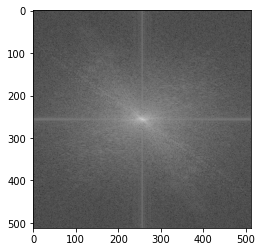

In [9]:
plt.imshow(magnitude_spectrum,"gray")

### 低通滤波器原理：
    通过构造掩码，把图像低频的地方覆盖起来，
     即mask中间位置为255（白），其他位置为0（黑）

In [10]:
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

In [13]:
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] = 1

#IDFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fa9c6ba55f8>)

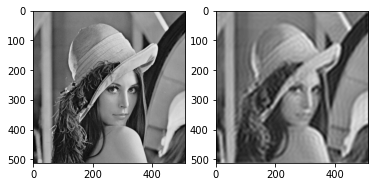

In [14]:
plt.subplot(121),plt.imshow(img,"gray")
plt.subplot(122),plt.imshow(img_back,"gray")

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fa9c5ca76d8>)

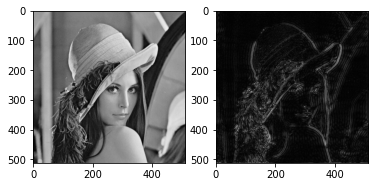

In [15]:
# 高通滤波器
mask = np.ones((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] = 0

fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img,"gray")
plt.subplot(122),plt.imshow(img_back,"gray")